In [22]:
from glob import glob
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import random
import numpy as np
from ats_module.TextPreprocessing import *
from ats_module.TextTagging import *
import seaborn as sns

c:\users\choi seung un\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\choi seung un\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\users\choi seung un\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# xlsx to csv 굉장히 오래걸림
# all_df = pd.DataFrame()
# for excel_path in tqdm(glob("../../data/원본엑셀/*.xlsx")):
#     # csv로 저장
#     csv_path = "".join(excel_path.split(".xlsx")[:-1])+".csv"
#     xlsx = pd.read_excel(excel_path)
#     xlsx.to_csv(csv_path, encoding="utf-8-sig")
#     df = pd.read_csv(csv_path, encoding="utf-8-sig", index_col=0)
#     all_df = pd.concat([all_df, df], axis=0)
    
# 취합
all_df = pd.DataFrame()    
for path in tqdm(glob("../../data/원본엑셀/*.csv")):
    df = pd.read_csv(path, encoding="utf-8-sig", index_col=0)
    all_df = pd.concat([all_df, df], axis=0)    
all_df.drop(["ID","FST_LABEL", "SCD_LABEL", "REMARK"], axis=1, inplace=True)
all_df


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]c:\users\choi seung un\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:07<00:01,  1.26s/it]c:\users\choi seung un\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (11,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.10s/it]


,BAS_YM,AGE_CD,GENDER,BAS_MON,BAS_DT,TRANS_MD,CNT,ATS_KDCD_DTL,DPS_TRN_AM,TEXTS_1
0,202201,55_59,2,1,5,입금,1,펌뱅킹 입금이체,110,BC
1,202201,60,2,1,17,입금,1,펌뱅킹 입금이체,251,BC
2,202201,45_49,1,1,14,입금,1,펌뱅킹 입금이체,86,BC
3,202201,45_49,2,1,16,입금,1,펌뱅킹 입금이체,17,BC
4,202201,60,1,1,20,입금,1,펌뱅킹 입금이체,2628,BC
...,...,...,...,...,...,...,...,...,...,...
4246094,202203,60,2,3,10,지급,1,한전 출금이체 서비스,1000,NaN
4246095,202203,50_54,2,3,31,지급,1,한전 출금이체 서비스,490,NaN
4246096,202205,50_54,1,5,2,지급,1,한전 출금이체 서비스,1000,NaN
4246097,202205,50_54,2,5,6,지급,1,한전 출금이체 서비스,1000,NaN


    unique_values   counts
0               0  1717072
1               1   133358
2               2    43938
3              10    42264
4               3    30199
5              30    29720
6              20    27659
7               5    25024
8               4    22177
9              50    20790
10              6    20130
11             15    19637
12             11    18569
13             12    18369
14              8    18199
15            100    18041
16              9    17989
17             16    17749
18              7    17660
19             13    16242
20             25    16157
21             17    15364
22             33    15089
23             14    14810
24             18    14713
25             22    14534
26             21    13669
27             35    13652
28             40    13521
29             19    13214
30             23    12947
31             28    12831
32             26    12353
33             24    12200
34             32    11929
35             27    11850
3

<AxesSubplot:xlabel='DPS_TRN_AM', ylabel='Count'>

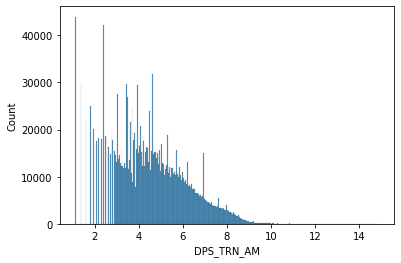

In [34]:
# 간단 ERD

pd.set_option('display.max_rows', 100)
print(all_df['DPS_TRN_AM'].value_counts().rename_axis('unique_values').reset_index(name='counts')[:100].to_string())

sns.histplot(np.log1p(all_df[~all_df['DPS_TRN_AM'].isin([0, 1])]['DPS_TRN_AM']))

In [4]:
# UID 데이터셋 생성
# 2022년 1~6월 기준1인당 입금 32건 출금 145건 전체 177건 -> 내 신한은행 이체내역 기준임.

uid = int(len(all_df)/177) # 전체 이체수/내 이체수

age_cd = all_df['AGE_CD'].value_counts().rename_axis().to_frame('counts')
age_cd['counts'] = age_cd['counts']/sum(age_cd['counts'])
age_cd_p = age_cd['counts'].to_list()
age_cd = age_cd.index.to_list()

gender = all_df['GENDER'].value_counts().rename_axis().to_frame('counts')
gender['counts'] = gender['counts']/sum(gender['counts'])
gender_p = gender['counts'].to_list()
gender = gender.index.to_list()

uid_df = pd.DataFrame()
uid_df['AGE_CD'] = np.random.choice(age_cd, uid, p=age_cd_p)
uid_df['GENDER'] = np.random.choice(gender, uid, p=gender_p)
    
uid_df["UID"] = "UID"+uid_df.index.astype(str).str.zfill(5)
uid_df

,AGE_CD,GENDER,UID
0,35_39,2,UID00000
1,60,1,UID00001
2,55_59,1,UID00002
3,30_34,1,UID00003
4,20_24,1,UID00004
...,...,...,...
21159,55_59,2,UID21159
21160,55_59,1,UID21160
21161,60,2,UID21161
21162,30_34,1,UID21162


In [5]:
len(uid_df[uid_df['AGE_CD'].isin(['40_44','45_49',])]), len(uid_df[uid_df['AGE_CD'].isin(['40_44','45_49',])])

(5499, 5499)

In [ ]:
def choice_uid(x, y):
    uid_list = uid_df[(uid_df['AGE_CD']==x) & (uid_df['GENDER']==y)]['UID'].tolist()
    return random.choice(uid_list)

all_df['UID'] = all_df.progress_apply(lambda x: choice_uid(x['AGE_CD'], x['GENDER']), axis=1)
all_df.to_csv('../../data/original_20230119.csv', encoding="utf-8-sig")

In [7]:
# 추후 전처리 - 클러스터링
all_df['ATS_KDCD_DTL'].unique(), len(all_df['ATS_KDCD_DTL'].unique())

(array(['펌뱅킹 입금이체', '인터넷뱅킹 대량이체', '전자뱅킹예약건별이체', '급여 입금이체', '일반대외대량 입금이체',
        '역환처리', 'CMS공동망 입금이체', '상여금 입금이체', '지로대량급여 입금이체', '어음만기입금',
        '전자금융 자금집금', '공공구매론 원금상환-여신팀', '수신해지예약-수신팀', '수신입금예약', '수신지급예약',
        '월지급펀드 분배금 지급-수신서비스부', 'AMA 입금 SWING C/C 처리-수신팀', '인터넷현물환지정가거래체결',
        '여신이자수입', '수익증권 업무종료후 입금예약-수신서비스부', '수익증권입금', 'PG(전자상거래)출금미완료처리',
        '재정자금전자이체', '퇴직연금 지급-수신팀', '연금지급', '납부자자동 입금이체',
        '골드뱅킹 자동이체-수신서비스부', '타행자동이체-전자금융부', '퇴직연금 적립이체-수신팀', '일반대출일괄실행',
        '대출모집인 수수료 지급및 입금-여신팀', '여신이자캐시백처리-여신외환부', '통장대출이자캐시백자동이체-수신자금부',
        '아파트관리비 출금이체', '마감후받을어음입금', '공무원대출 보증료환급', 'ISA 신탁형 지급-수신팀',
        '수익증권 연금(분배금) 지급-수신팀', '예금이자원가', 'CMS공동망 출금이체', '신탁이자원가',
        '해외결제자금 가맹점 정산', '연금저축펀드 자동예약-수신자금부', '외화계좌 체크카드 해외이용대금 출금',
        '요구불간계좌이체', '신용카드 선불카드 정산', '지로일반이체 입금이체', '온비드 낙찰 이체 취소 처리',
        '외화정기예금자동갱신', '전자어음 입금처리 및 수수료출금처리', '마감후환어음입금', '타익신탁지급',
        '국민주택채권 수수료지급-수신팀', '3순위청약증거금환불', '특수채권일괄편입', '일괄보증서보증료수입',
        '대외대량이체 자금정산', 

In [46]:
all_df = pd.read_csv('../../data/original_20230119.csv', encoding="utf-8-sig", index_col=0)

# 중복제거
# 하드웨어 문제 때문에 데이터 좀 줄여야함
all_df = all_df.drop_duplicates(subset=['TRANS_MD','ATS_KDCD_DTL','DPS_TRN_AM','TEXTS_1',],keep='last') # 중복제거
all_df

c:\users\choi seung un\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,BAS_YM,AGE_CD,GENDER,BAS_MON,BAS_DT,TRANS_MD,CNT,ATS_KDCD_DTL,DPS_TRN_AM,TEXTS_1,UID
67,202201,50_54,1,1,11,입금,1,펌뱅킹 입금이체,3319,BC,UID03952
276,202201,50_54,2,1,14,입금,1,펌뱅킹 입금이체,1671,BC,UID17126
558,202201,35_39,1,1,11,입금,1,펌뱅킹 입금이체,1640,BC,UID11340
560,202201,35_39,1,1,25,입금,1,펌뱅킹 입금이체,3631,BC,UID05418
613,202201,45_49,1,1,3,입금,1,펌뱅킹 입금이체,1942,BC,UID18993
...,...,...,...,...,...,...,...,...,...,...,...
4246086,202206,50_54,2,6,27,지급,1,펌뱅킹 출금이체,0,NaN,UID04046
4246093,202203,50_54,2,3,10,지급,1,한전 출금이체 서비스,0,NaN,UID16513
4246095,202203,50_54,2,3,31,지급,1,한전 출금이체 서비스,490,NaN,UID16147
4246097,202205,50_54,2,5,6,지급,1,한전 출금이체 서비스,1000,NaN,UID08202


In [47]:
# 적요 대분류
# 전처리 순서
nk = Nickonlpy()
nwt = NicWordTagging()

# 공백을 전부 0으로
all_df['TEXTS_1'] = all_df['TEXTS_1'].str.replace(" ","0")

def text1_preprocessing(trans_md, text):
    text = find_null(text)
    text = ascii_check(text)
    text = change_upper(text)
    text = space_delete(text)
    text = remove_bank(text)
    text = corporatebody(text)
    text = numbers_to_zero(text)
    text = remove_specialchar(text)
    text = space_delete(text)
    text = find_null(text)
    if (text != "공백") or (len(text) >= 1):
        # tagging
        text = nk.predict_tokennize(text)
        result = nwt.text_tagging(text, trans_md)
        text = nk.name_check(text)

    return result[0] # 대분류만

index = 1
a = all_df.iloc[index]
text1_preprocessing(a['TRANS_MD'], a['TEXTS_1'])

c:\users\choi seung un\appdata\local\programs\python\python38\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


'소득'

In [ ]:
all_df['TEXTS_2'] = all_df.progress_apply(lambda x: text1_preprocessing(x['TRANS_MD'], x['TEXTS_1']), axis=1)
all_df.to_csv('../../data/duplicates_20230126.csv', encoding="utf-8-sig")
all_df

In [3]:
all_df = pd.read_csv('../../data/duplicates_20230126.csv', encoding="utf-8-sig", index_col=0)


In [20]:

def ats_kdcd_dtl(string):
    if "보증료" in string:
        return "보증료"
    elif any(i in string for i in ["외화", "해외"]):
        return "해외"
    elif "연금" in string:
        return "연금"    
    elif "수익증권" in string:
        return "증권"    
    elif any(i in string for i in ["어음", "역환처리"]):
        return "어음"   
    elif "재정자금" in string:
        return "재정자금" 
    elif "이자" in string:
        return "이자"     
    elif any(i in string for i in ["타행자동이체", "요구불간", "납부자자동", "스쿨뱅킹", "일반대출"]):
        return "자동이체"    
    elif "예약" in string:
        return "예약이체"      
    elif any(i in string for i in ["급여", "상여금", "지로대량급여"]):
        return "급여"    
    elif any(i in string for i in ["지로", "아파트관리비", "한전"]):
        return "요금납부"        
    elif any(i in string for i in ["적립식", "예금"]):
        return "예금"        
    elif "대량" in string:
        return "대량이체"  
    elif any(i in string for i in ["CMS공동망", "전자금융", "대금", "PG", "AMA"]):
        return "전자결제"      
    elif "펌뱅킹" in string:
        return "펌뱅킹"  
    else:
        return "그외"

string = "펌뱅킹 대량이체"
ats_kdcd_dtl(string)


'대량이체'

In [4]:
# ATS_KDCD_DTL 전처리
test = all_df.copy()

test.loc[test['ATS_KDCD_DTL'].str.contains('보증료'), 'ATS_KDCD_DTL'] = "보증료"
test.loc[test['ATS_KDCD_DTL'].str.contains("|".join(['외화', '해외'])), 'ATS_KDCD_DTL'] = "해외"
test.loc[test['ATS_KDCD_DTL'].str.contains('연금'), 'ATS_KDCD_DTL'] = "연금"
test.loc[test['ATS_KDCD_DTL'].str.contains('수익증권'), 'ATS_KDCD_DTL'] = "증권"
test.loc[test['ATS_KDCD_DTL'].str.contains("|".join(['어음', '역환처리'])), 'ATS_KDCD_DTL'] = "어음"
test.loc[test['ATS_KDCD_DTL'].str.contains('재정자금'), 'ATS_KDCD_DTL'] = "재정자금"
test.loc[test['ATS_KDCD_DTL'].str.contains("|".join(['이자'])), 'ATS_KDCD_DTL'] = "이자"

# 요구불간도 자동이체라 하는데 잘 모르겠음
# 일단 스쿨뱅킹도 자동이체쪽으로
test.loc[test['ATS_KDCD_DTL'].str.contains("|".join(['타행자동이체', \
                                                     '요구불간', \
                                                     '납부자자동', \
                                                     '스쿨뱅킹', \
                                                     '일반대출'])), 'ATS_KDCD_DTL'] = "자동이체"

test.loc[test['ATS_KDCD_DTL'].str.contains('예약'), 'ATS_KDCD_DTL'] = "예약이체"
# 상여금도 급여쪽으로 일단
test.loc[test['ATS_KDCD_DTL'].str.contains("|".join(['급여', '상여금', '지로대량급여'])), 'ATS_KDCD_DTL'] = "급여"
test.loc[test['ATS_KDCD_DTL'].str.contains("|".join(['지로', '아파트관리비', '한전'])), 'ATS_KDCD_DTL'] = "요금납부"
test.loc[test['ATS_KDCD_DTL'].str.contains("|".join(['적립식', "예금"])), 'ATS_KDCD_DTL'] = "예금"
test.loc[test['ATS_KDCD_DTL'].str.contains('대량'), 'ATS_KDCD_DTL'] = "대량이체"
# 일단 전자금융도 CMS로 잘모름
test.loc[test['ATS_KDCD_DTL'].str.contains("|".join(['CMS공동망', '전자금융', '대금', 'PG', 'AMA'])), 'ATS_KDCD_DTL'] = "전자결제"
test.loc[test['ATS_KDCD_DTL'].str.contains('펌뱅킹'), 'ATS_KDCD_DTL'] = "펌뱅킹"


index = 15
# test_result = test['ATS_KDCD_DTL'].value_counts().rename_axis('unique_values').reset_index(name='counts')[index:]
test_result = test['ATS_KDCD_DTL'].value_counts().rename_axis('unique_values').reset_index(name='counts')[:index]
print(test['ATS_KDCD_DTL'].value_counts().rename_axis('unique_values').reset_index(name='counts')[index:].sum())

ats_dict = {"펌뱅킹":1,
            "전자결제":2,
            "대량이체":3,
            "예금":4,
            "급여":5,
            "요금납부":6,
            "자동이체":7,
            "예약이체":8,
            "이자":9,
            "재정자금":10,
            "어음":11,
            "증권":12,
            "연금":13,
            "해외":14,
            "보증료":15,}

# 나머지는 그외로
test.loc[~test['ATS_KDCD_DTL'].isin(ats_dict.keys()), 'ATS_KDCD_DTL'] = "그외"
test['ATS_KDCD_DTL'].value_counts().rename_axis('unique_values').reset_index(name='counts')


ats_dict["그외"] = 0
all_df['ATS_KDCD_DTL'] = test['ATS_KDCD_DTL'].map(ats_dict)
all_df

unique_values    ISA 적립이체-수신팀대출모집인 수수료 지급및 입금-여신팀특정ELS지급-수신서비스부...
counts                                                         147
dtype: object


,BAS_YM,AGE_CD,GENDER,BAS_MON,BAS_DT,TRANS_MD,CNT,ATS_KDCD_DTL,DPS_TRN_AM,TEXTS_1,UID,TEXTS_2
2029421,202201,50_54,1,1,25,지급,1,9,7,0000000000000(0000),UID10799,개인거래
2029422,202203,50_54,1,3,25,지급,1,9,5,0000000000000(0000),UID05521,개인거래
2029423,202204,60,1,4,18,지급,1,9,54,0000000000000(0000),UID14826,개인거래
2029425,202201,60,1,1,10,지급,1,9,9,0000000000000(000),UID20813,개인거래
2029426,202201,60,1,1,5,지급,1,9,3,0000000000000(000),UID11411,개인거래
...,...,...,...,...,...,...,...,...,...,...,...,...
2029410,202201,60,2,1,20,입금,1,6,169,NaN,UID06385,입금이체
2029411,202202,35_39,2,2,3,입금,1,6,926,NaN,UID01040,입금이체
2029413,202203,45_49,2,3,25,입금,1,6,218,NaN,UID07313,입금이체
2029415,202204,60,1,4,15,입금,1,6,1000,NaN,UID13437,입금이체


In [5]:
# DPS_TRN_AM 전처리

# 금액을 범주형으로 
# 0이하 = 1000원 이하
# 1이상 9이하 = 1000원이상 9000원 이하
# 10이상 49이하 = 10000원이상 49000원 이하
# 50이상 99이하 = 50000원이상 99000원 이하
# 100이상 499이하 = 100000원이상 499000원 이하
# 500이상 999이하 = 500000원이상 999000원 이하
# 1000이상 4999이하 = 1000000원이상 4999000원 이하
# 5000이상 9999이하 = 5000000원이상 9999000원 이하
# 10000이상 49900이하 = 10000000원이상 49999000원 이하
# 50000이상  = 50000000원이상

all_df['DPS_TRN_AM'] = np.digitize(all_df['DPS_TRN_AM'], bins=[0, 9, 49, 99, 499, 999, 4999, 9999, 49900]) # 구간화
all_df = all_df.drop_duplicates(subset=['TRANS_MD','ATS_KDCD_DTL','DPS_TRN_AM','TEXTS_1',],keep='last') # 중복제거
all_df

# all_df['DPS_TRN_AM'] = np.log1p(test['DPS_TRN_AM'])
# all_df

,BAS_YM,AGE_CD,GENDER,BAS_MON,BAS_DT,TRANS_MD,CNT,ATS_KDCD_DTL,DPS_TRN_AM,TEXTS_1,UID,TEXTS_2
2029422,202203,50_54,1,3,25,지급,1,9,1,0000000000000(0000),UID05521,개인거래
2029423,202204,60,1,4,18,지급,1,9,3,0000000000000(0000),UID14826,개인거래
2029439,202203,45_49,1,3,25,지급,1,9,4,0000000000000(000),UID03886,개인거래
2029456,202205,50_54,1,5,3,지급,1,9,2,0000000000000(000),UID00727,개인거래
2029458,202205,50_54,2,5,12,지급,1,9,3,0000000000000(000),UID12520,개인거래
...,...,...,...,...,...,...,...,...,...,...,...,...
2029409,202206,60,1,6,27,입금,1,1,1,NaN,UID07676,입금이체
2029411,202202,35_39,2,2,3,입금,1,6,5,NaN,UID01040,입금이체
2029413,202203,45_49,2,3,25,입금,1,6,4,NaN,UID07313,입금이체
2029415,202204,60,1,4,15,입금,1,6,6,NaN,UID13437,입금이체


In [6]:
# AGE_CD 전처리
print(test['AGE_CD'].value_counts())
age_dict = {"10":0,
           "20_24":1,
           "25_29":2,
           "30_34":3,
           "35_39":4,
           "40_44":5,
           "45_49":6,
           "50_54":7,
           "55_59":8,
           "60":9,}

all_df['AGE_CD'] = test['AGE_CD'].map(age_dict)
all_df

40_44    48603
45_49    43629
60       43069
50_54    40868
35_39    39907
55_59    29068
30_34    28043
25_29    18681
20_24     6371
10         796
Name: AGE_CD, dtype: int64


<ipython-input-6-00f5f32c1bf0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['AGE_CD'] = test['AGE_CD'].map(age_dict)


,BAS_YM,AGE_CD,GENDER,BAS_MON,BAS_DT,TRANS_MD,CNT,ATS_KDCD_DTL,DPS_TRN_AM,TEXTS_1,UID,TEXTS_2
2029422,202203,7,1,3,25,지급,1,9,1,0000000000000(0000),UID05521,개인거래
2029423,202204,9,1,4,18,지급,1,9,3,0000000000000(0000),UID14826,개인거래
2029439,202203,6,1,3,25,지급,1,9,4,0000000000000(000),UID03886,개인거래
2029456,202205,7,1,5,3,지급,1,9,2,0000000000000(000),UID00727,개인거래
2029458,202205,7,2,5,12,지급,1,9,3,0000000000000(000),UID12520,개인거래
...,...,...,...,...,...,...,...,...,...,...,...,...
2029409,202206,9,1,6,27,입금,1,1,1,NaN,UID07676,입금이체
2029411,202202,4,2,2,3,입금,1,6,5,NaN,UID01040,입금이체
2029413,202203,6,2,3,25,입금,1,6,4,NaN,UID07313,입금이체
2029415,202204,9,1,4,15,입금,1,6,6,NaN,UID13437,입금이체


In [32]:
a = 202203
b = 3

def weekday(ym, day):
    week = datetime.datetime(int(str(ym)[:4]), int(str(ym)[-2:]), day).weekday()
    if week < 5:
        return 0
    else:
        return 1
    
import datetime
c = datetime.datetime(int(str(a)[:4]), int(str(a)[-2:]), b).weekday()
c

3

In [7]:
# weekday 
test['day'] = test['BAS_YM'].astype(str) + test['BAS_DT'].astype(str).str.zfill(2)
test['weekday'] = pd.to_datetime(test['day'], format="%Y-%m-%d").dt.weekday

# 평일,주말 생성. 평일=0, 주말=1
test.loc[test['weekday']<5, 'weekday'] = 0
test.loc[test['weekday']>=5, 'weekday'] = 1

all_df['WEEKDAY'] = test['weekday']
all_df

<ipython-input-7-bfee089460e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['WEEKDAY'] = test['weekday']


,BAS_YM,AGE_CD,GENDER,BAS_MON,BAS_DT,TRANS_MD,CNT,ATS_KDCD_DTL,DPS_TRN_AM,TEXTS_1,UID,TEXTS_2,WEEKDAY
2029422,202203,7,1,3,25,지급,1,9,1,0000000000000(0000),UID05521,개인거래,0
2029423,202204,9,1,4,18,지급,1,9,3,0000000000000(0000),UID14826,개인거래,0
2029439,202203,6,1,3,25,지급,1,9,4,0000000000000(000),UID03886,개인거래,0
2029456,202205,7,1,5,3,지급,1,9,2,0000000000000(000),UID00727,개인거래,0
2029458,202205,7,2,5,12,지급,1,9,3,0000000000000(000),UID12520,개인거래,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029409,202206,9,1,6,27,입금,1,1,1,NaN,UID07676,입금이체,0
2029411,202202,4,2,2,3,입금,1,6,5,NaN,UID01040,입금이체,0
2029413,202203,6,2,3,25,입금,1,6,4,NaN,UID07313,입금이체,0
2029415,202204,9,1,4,15,입금,1,6,6,NaN,UID13437,입금이체,0


In [8]:
# TRANS_MD 전처리
# # 지급: 1, 입금: 2
all_df['TRANS_MD'] = test['TRANS_MD'].map({"지급":1,"입금": 2})
all_df

<ipython-input-8-3a02c0a472f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['TRANS_MD'] = test['TRANS_MD'].map({"지급":1,"입금": 2})


,BAS_YM,AGE_CD,GENDER,BAS_MON,BAS_DT,TRANS_MD,CNT,ATS_KDCD_DTL,DPS_TRN_AM,TEXTS_1,UID,TEXTS_2,WEEKDAY
2029422,202203,7,1,3,25,1,1,9,1,0000000000000(0000),UID05521,개인거래,0
2029423,202204,9,1,4,18,1,1,9,3,0000000000000(0000),UID14826,개인거래,0
2029439,202203,6,1,3,25,1,1,9,4,0000000000000(000),UID03886,개인거래,0
2029456,202205,7,1,5,3,1,1,9,2,0000000000000(000),UID00727,개인거래,0
2029458,202205,7,2,5,12,1,1,9,3,0000000000000(000),UID12520,개인거래,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029409,202206,9,1,6,27,2,1,1,1,NaN,UID07676,입금이체,0
2029411,202202,4,2,2,3,2,1,6,5,NaN,UID01040,입금이체,0
2029413,202203,6,2,3,25,2,1,6,4,NaN,UID07313,입금이체,0
2029415,202204,9,1,4,15,2,1,6,6,NaN,UID13437,입금이체,0


In [9]:
# TEXTS_2 전처리
print(test['TEXTS_2'].value_counts())
tests_dict = {"개인거래":0,
              "입금이체":1,
              "금융":2,
              "기타":3,
              "소득":4,
              "서비스이용":5,
              "주거/생활":6,
              "교육":7,
              "금융수익":8,
              "여가":9,
              "자동차":10,}

all_df['TEXTS_2'] = test['TEXTS_2'].map(tests_dict)
all_df

금융       74340
입금이체     60393
개인거래     55705
소득       45690
기타       21154
주거/생활    13189
금융수익     12392
서비스이용     9657
교육        3481
여가        1796
자동차       1238
Name: TEXTS_2, dtype: int64


<ipython-input-9-cda1895c48f5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['TEXTS_2'] = test['TEXTS_2'].map(tests_dict)


,BAS_YM,AGE_CD,GENDER,BAS_MON,BAS_DT,TRANS_MD,CNT,ATS_KDCD_DTL,DPS_TRN_AM,TEXTS_1,UID,TEXTS_2,WEEKDAY
2029422,202203,7,1,3,25,1,1,9,1,0000000000000(0000),UID05521,0,0
2029423,202204,9,1,4,18,1,1,9,3,0000000000000(0000),UID14826,0,0
2029439,202203,6,1,3,25,1,1,9,4,0000000000000(000),UID03886,0,0
2029456,202205,7,1,5,3,1,1,9,2,0000000000000(000),UID00727,0,0
2029458,202205,7,2,5,12,1,1,9,3,0000000000000(000),UID12520,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029409,202206,9,1,6,27,2,1,1,1,NaN,UID07676,1,0
2029411,202202,4,2,2,3,2,1,6,5,NaN,UID01040,1,0
2029413,202203,6,2,3,25,2,1,6,4,NaN,UID07313,1,0
2029415,202204,9,1,4,15,2,1,6,6,NaN,UID13437,1,0


In [10]:
all_df.to_csv('../../data/preprocessing_20230127.csv', encoding="utf-8-sig")